# SPI Momentum

Add a description of the project here, just a brief overview. Describe the context, datasets used, and key objectives

### Setup and Dependencies
Import Libraries: Create a separate cell for importing all the necessary libraries (e.g., pandas, numpy, matplotlib, etc.).
Import functions: Import all the necessary funcitons for data loading, backtesting, etc.
Set Environment Variable: 
Set cache directory (if needed):

In [72]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path
import sys

# Add the project root directory to sys.path
project_root = Path(os.getcwd()).resolve().parents[0] # strange, does that work for you too guys???
#DEBUG print(project_root)
sys.path.append(str(project_root))

# Load other funcitons
from src.analysis.load_data import load_data
from src.visualization.plotPerformance import plot_cumulative_returns
from src.visualization.plotRobustnessChecks import plotRobustnessChecks
from src.analysis.summarize_performance import summarize_performance, save_summary_to_latex
from src.analysis.momentum_strategy_backtest import momentum_strategy

### Data Import and Overview

Load data here and explain what the processing does

In [76]:
# Define the base path for file locations
base_path = project_root

# Construct file paths dynamically
constituents_data_path = base_path / "data" / "processed" / "constituents_data.csv"
rf_monthly_path = base_path / "data" / "processed" / "risk_free.csv"
results_path = base_path / "data" / "results"
spi_path = base_path / "data" / "processed" / "index_data.csv"
summary_file_path_longOnly = results_path / "summary_performance_longOnly.tex"
summary_file_path_longShort = results_path / "summary_performance_longShort.tex"
visualization_path = base_path / "reports" / "figures"

# Load financial data
rf_monthly = load_data(rf_monthly_path)
price_data_daily = load_data(constituents_data_path)
spi_price_daily = load_data(spi_path)
spi_price_monthly = spi_price_daily.resample('ME').last()

# Calculate Benchmark Returns and correct for massive outliers
spi_returns_monthly = spi_price_monthly.pct_change()
if isinstance(spi_returns_monthly, pd.Series):
    spi_returns_monthly = spi_returns_monthly.to_frame()
spi_returns_monthly = np.clip(spi_returns_monthly, -0.5, 0.5)
spi_XsReturns_monthly = spi_returns_monthly['SWISS PERFORMANCE INDEX - TOT RETURN IND'] - rf_monthly['monthly_return']
if isinstance(spi_XsReturns_monthly, pd.Series):
    spi_XsReturns_monthly = spi_XsReturns_monthly.to_frame()

# Rename Coluns for consistency
spi_XsReturns_monthly.columns = ['Benchmark']
spi_returns_monthly.columns = ['Benchmark']

### Set up Basic Parameters for Analysis

Since the project is fully reproducable, we decided to include the most important strategy paratemers on this level so that any potential future researcher can simply change the parameters for the analysis here. As a basic set up we chose to use the parameters as listed below. Of course, there will be rubustness checks for all those parameters at the end. 

In [80]:
lookback_period = 6    # Number of months to look back
holding_period = 6     # Number of months the assets will be held
nLong = 20             # Number of assets to go long
nShort = 20            # Number of assets to short
trx_cost = 0           # Transaction Costs (i.e. 0.01 = 1%)

### Momentum Analysis
Run the analysis code here and compare results to benchmark, show performance stats. etc., show Long and Long-Short + table with most important stats

/Users/steve/Documents/Coding/my-project/SPI-Momentum/src/analysis/momentum_strategy_backtest.py:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_prices = data.resample('M').last()


<bound method NDFrame.head of             Strategy_Returns
date                        
1999-12-31         -0.004753
2000-01-31         -0.004605
2000-02-29         -0.005217
2000-03-31         -0.006210
2000-04-30         -0.005024
...                      ...
2024-06-30         -0.005978
2024-07-31          0.021713
2024-08-31          0.001544
2024-09-30         -0.022510
2024-10-31         -0.008922

[299 rows x 1 columns]>
<class 'pandas.core.frame.DataFrame'>
Summary saved to /Users/steve/Documents/Coding/my-project/SPI-Momentum/data/results/summary_performance_longOnly.tex


/Users/steve/Documents/Coding/my-project/SPI-Momentum/src/analysis/summarize_performance.py:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  xs_returns = xs_returns.asfreq('M')
/Users/steve/Documents/Coding/my-project/SPI-Momentum/src/analysis/summarize_performance.py:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  rf = rf.asfreq('M')
/Users/steve/Documents/Coding/my-project/SPI-Momentum/src/analysis/summarize_performance.py:26: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  factor_xs_returns = factor_xs_returns.asfreq('M')
/Users/steve/Documents/Coding/my-project/SPI-Momentum/src/analysis/summarize_performance.py:35: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  rf = rf.fillna(method='ffill').fillna(method='bfill')
/Users/steve/Do

<bound method NDFrame.head of             Strategy_Returns
date                        
1999-12-31          0.000000
2000-01-31          0.000000
2000-02-29          0.000000
2000-03-31          0.000000
2000-04-30          0.000000
...                      ...
2024-06-30          0.078389
2024-07-31          0.043807
2024-08-31          0.083110
2024-09-30          0.033701
2024-10-31          0.119176

[299 rows x 1 columns]>
<class 'pandas.core.frame.DataFrame'>
Summary saved to /Users/steve/Documents/Coding/my-project/SPI-Momentum/data/results/summary_performance_longShort.tex


/Users/steve/Documents/Coding/my-project/SPI-Momentum/src/analysis/summarize_performance.py:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  xs_returns = xs_returns.asfreq('M')
/Users/steve/Documents/Coding/my-project/SPI-Momentum/src/analysis/summarize_performance.py:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  rf = rf.asfreq('M')
/Users/steve/Documents/Coding/my-project/SPI-Momentum/src/analysis/summarize_performance.py:26: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  factor_xs_returns = factor_xs_returns.asfreq('M')
/Users/steve/Documents/Coding/my-project/SPI-Momentum/src/analysis/summarize_performance.py:35: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  rf = rf.fillna(method='ffill').fillna(method='bfill')
/Users/steve/Do

Save the summarize performance plot to /Users/steve/Documents/Coding/my-project/SPI-Momentum/reports/figures/cumulative_returns


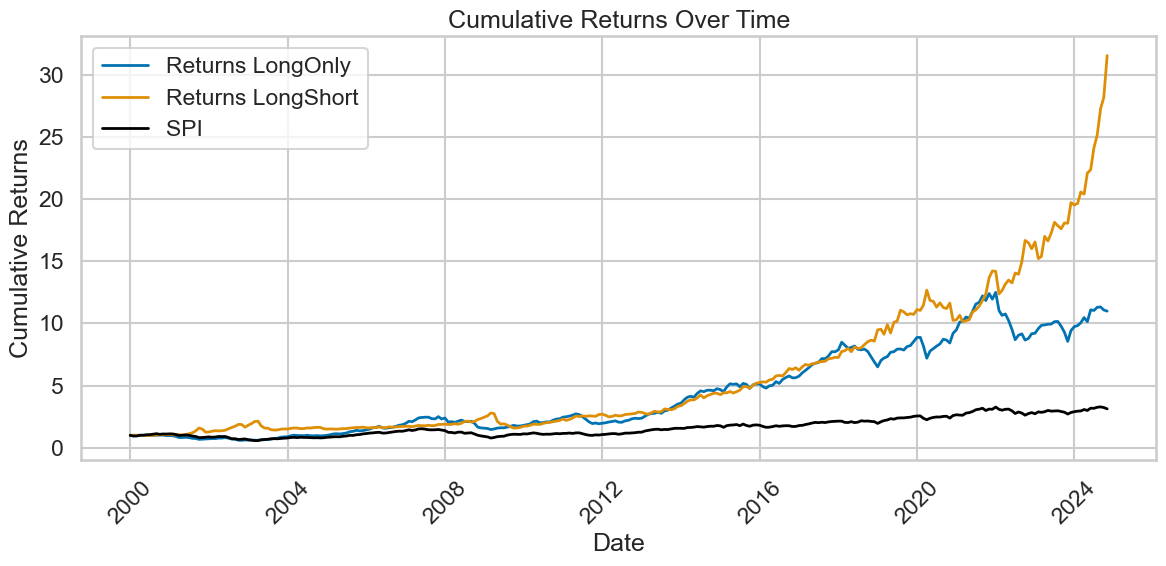

In [87]:
# ----- Execute Long only backtest -----
excess_returns_longOnly, portfolio_weights_longOnly, turnover_series_longOnly, portfolio_returns_longOnly = momentum_strategy(
    price_data_daily=price_data_daily,
    lookback_period=lookback_period,
    nLong=nLong,
    nShort=0,
    holding_period=holding_period,
    rf_monthly=rf_monthly,
    trx_cost=0
)
excess_returns_longOnly.columns = ['Xs Returns LongOnly']
portfolio_returns_longOnly.columns = ['Returns LongOnly']

# Save results, might delete the writing to csv???
excess_returns_longOnly.to_csv(results_path / "excess_returns_longOnly.csv", index=True, header=True)
portfolio_weights_longOnly.to_csv(results_path / "portfolio_weights_longOnly.csv", index=True, header=True)
turnover_series_longOnly.to_csv(results_path / "turnover_series_longOnly.csv", index=True, header=True)
stats_longOnly = summarize_performance(excess_returns_longOnly, rf_monthly, spi_XsReturns_monthly, 12)
save_summary_to_latex(stats_longOnly, summary_file_path_longOnly)

# ----- Execute Long / Short backtest -----
excess_returns_longShort, portfolio_weights_longShort, turnover_series_longShort, portfolio_returns_longShort = momentum_strategy(
    price_data_daily=price_data_daily,
    lookback_period=lookback_period,
    nLong=nLong,
    nShort=nShort,
    holding_period=holding_period,
    rf_monthly=rf_monthly,
    trx_cost=0
)
excess_returns_longShort.columns = ['Xs Returns LongShort']
portfolio_returns_longShort.columns = ['Returns LongShort']

# Save results, might delete the writing to csv???
excess_returns_longShort.to_csv(results_path / "excess_returns_longShort.csv", index=True, header=True)
portfolio_weights_longShort.to_csv(results_path / "portfolio_weights_longShort.csv", index=True, header=True)
turnover_series_longShort.to_csv(results_path / "turnover_series_longShort.csv", index=True, header=True)
stats_longShort = summarize_performance(excess_returns_longShort, rf_monthly, spi_XsReturns_monthly, 12)
save_summary_to_latex(stats_longShort, summary_file_path_longShort)


# Custom labels
labels = {
    'Strategy_Returns': 'Long Momentum Strategy',
    'Benchmark': 'SPI',
    'Portfolio_Returns': 'Long Momentum Strategy',
    'xs_Return': 'Long Momentum Strategy',
    'trx_cost_0.001': 'Strategy with Trx Cost: 0.1%',
    'trx_cost_0.005': 'Strategy with Trx Cost: 0.5%',
    'trx_cost_0.01': 'Strategy with Trx Cost: 1.0%',
}

# Create plot of cummulative returns against benchmark
combined_returns = pd.concat([portfolio_returns_longOnly, portfolio_returns_longShort], axis=1)
plot_cumulative_returns(combined_returns, spi_returns_monthly, labels,filename=visualization_path / "cumulative_returns")


### Robustness Checks
Perform robustness checks here over different input parameters that we "arbitraily" chose: lookback period, holding period, nLong/nShort, trx cost

### Interpretation and Conclusion 